In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# create
t = np.arange(0,10,0.25)

def my_sigmoid(t, A=0.25, k=1.25, C=-3):

    y = 1/(A + np.exp(-(k*t + C)))
    return y

def my_logit(y, A=0.25):
    return np.log(A*y/(1-A*y))

# Because there was random noise added to the y we fit
# the max value of y can be above 1/A
# this leads to undefined logit(y,A) = ln(Ay/(1-Ay))
# When calculating residuals of the logit, I ignore the nan points
def my_residuals(y,z):
    # y can have nans
    mask = ~np.isnan(y)
    y = y[mask]
    z = z[mask]
    
    return np.sum((y-z)**2)

sigma=0.15
randos = np.random.randn(len(t))*sigma    
y = my_sigmoid(t) + randos

ly = my_logit(y, A=0.25)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in log


In [113]:
print len(t), t
print len(y), y
print len(ly), ly

print y[-2]
A=0.25
print A*y[-2], 1-A*y[-2]

40 [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75]
40 [ 0.17142633  0.2183685  -0.09695208 -0.08016991  0.19746544  0.13093977
  0.32123623  0.977823    0.36223899  0.64319366  0.7275088   0.80410048
  1.42272537  1.55940054  2.14568099  2.28385847  2.61094895  2.79991828
  3.01753214  3.52841569  3.64609149  3.708443    3.75458267  3.71528007
  3.73996326  3.95468965  3.84595337  3.80482101  3.81544718  3.9412885
  4.04058482  4.18594397  3.92646161  4.38206292  4.05771598  3.81693128
  3.86495493  3.98793787  3.84955938  4.05671856]
40 [-3.10609397 -2.85172683         nan         nan -2.95785956 -3.38602945
 -2.43815526 -1.12840404 -2.30681947 -1.65229945 -1.50368071 -1.37989963
 -0.59415818 -0.44794221  0.14593946  0.28578784  0.63109292  0.84720057
  1.12212697  2.01250633  2.3323726   2.

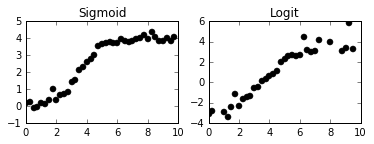

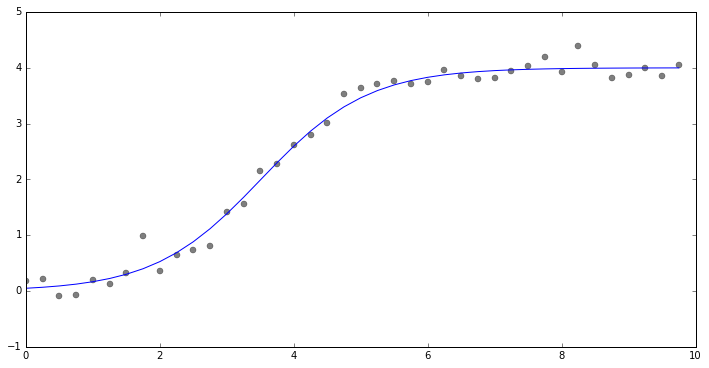

In [114]:
plt.subplot(2,2,1)
plt.plot(t,y,'ko', label='y 1/0.25+e(-(0.5t+3))')
plt.title('Sigmoid')

plt.subplot(2,2,2)
plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))')
plt.title('Logit')

plt.figure(figsize=(12,6))
plt.plot(t,y,'ko', alpha=0.5)
plt.plot(t,my_sigmoid(t))

In [120]:
# Because there was random noise added to the y we fit
# the max value of y can be above 1/A
# this leads to undefined logit(y,A) = ln(Ay/(1-Ay))
# I plot as purple diamonds such points to show where they are

def logit_scatter_plotter(t,ly):
    mask = np.isnan(ly)
    ly1 = my_logit(my_sigmoid(t[np.isnan(ly)]))
#     print t, ly1, mask
    plt.plot(t[mask], ly1, 'd', color='purple', label='nan')
    plt.plot(t[~mask],ly[~mask],'ko', label='log(Ay/(1-Ay))', alpha=0.5)
    plt.plot(t, my_logit(my_sigmoid(t)), 'k:', label='best')

def sigmoid_scatter_plotter(t,y,ly):
    mask = np.isnan(ly)
    plt.plot(t[mask], y[mask], 'd', color='purple', label='logit(A)=nan')
    plt.plot(t[~mask],y[~mask],'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5) 
    plt.plot(t, my_sigmoid(t), 'k:', label='best')

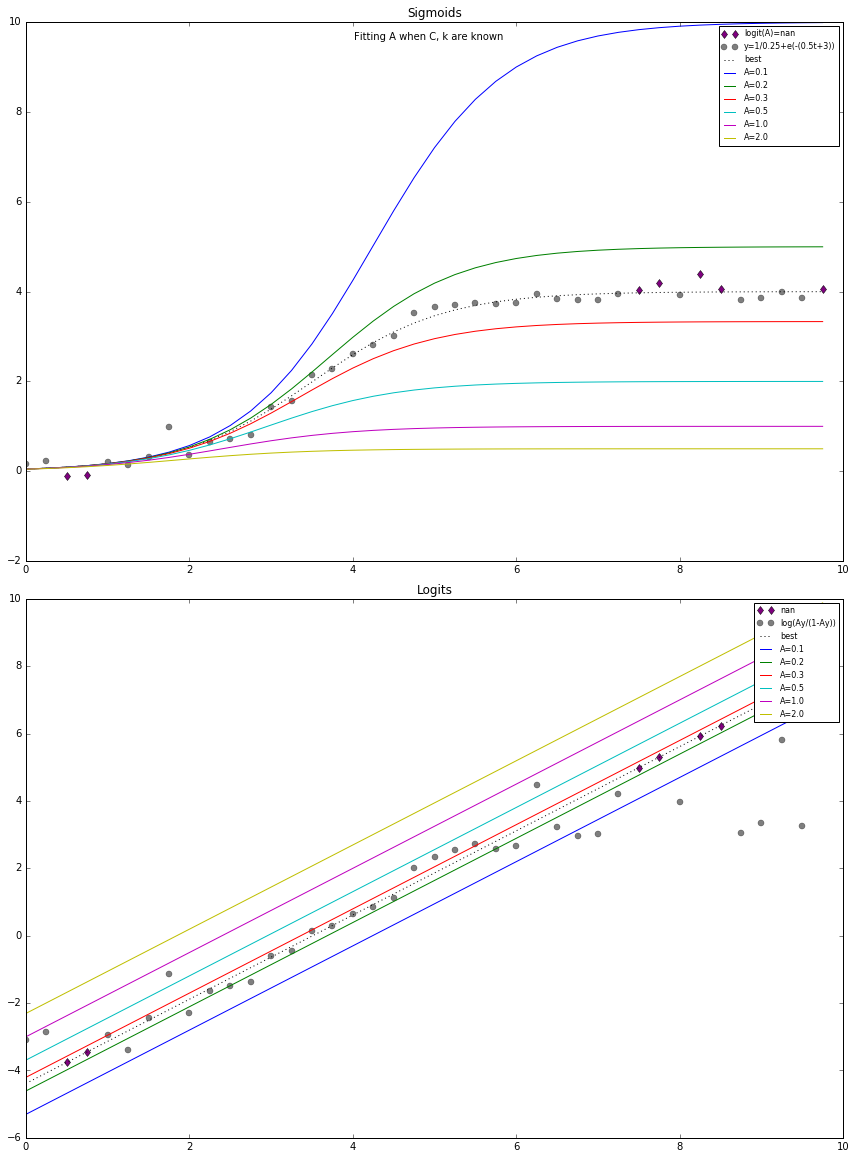

In [126]:
# consider a family of curves trying to guess the parameters
## FIND THE A    
As = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0]

plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
# plt.plot(t,y,'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5)
sigmoid_scatter_plotter(t,y,ly)
plt.subplot(3,1,2)
# plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))', alpha=0.5)
logit_scatter_plotter(t,ly)
rz = []
rlz = []
for A in As:
    plt.subplot(3,1,1)
    z = my_sigmoid(t, A=A)
    plt.plot(t,z,label=('A=%s' % A))
    plt.subplot(3,1,2)
    lz = my_logit(z, A=A)
    plt.plot(t,lz,label=('A=%s' % A))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,1)
plt.legend(fontsize=8)
plt.title('Sigmoids')

plt.subplot(3,1,2)
plt.legend(fontsize=8)
plt.title('Logits')

# plt.subplot(3,1,3)
# plt.plot(As, rz, label='z')
# plt.plot(As, rlz, '-o',label='lz')
# plt.axvline(0.25, color='k', linestyle=':')
# plt.legend(fontsize=8)
# plt.title('Residuals')

plt.tight_layout()
plt.suptitle('Fitting A when C, k are known')

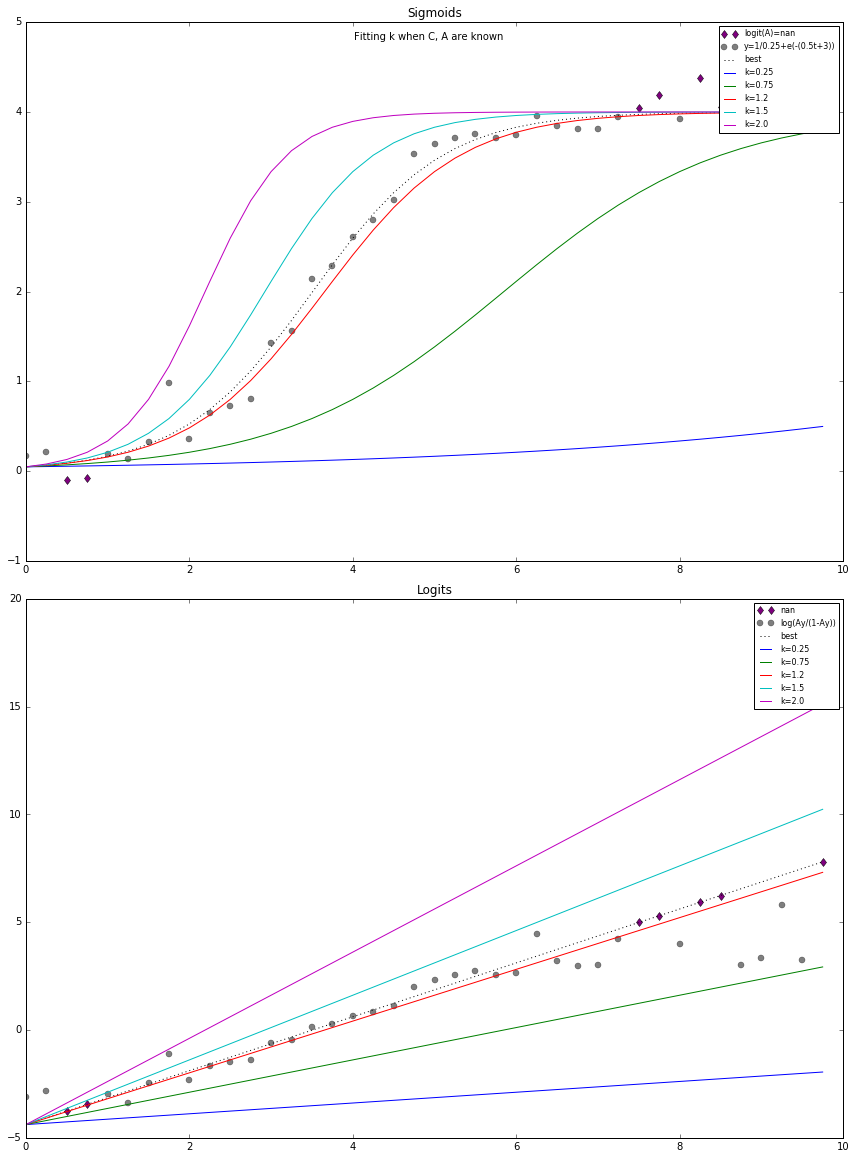

In [127]:
# consider a family of curves trying to guess the parameters
## FIND THE k's
    
ks = [0.25, 0.75, 1.2, 1.5, 2.0]

plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
# plt.plot(t,y,'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5)
sigmoid_scatter_plotter(t,y,ly)
plt.subplot(3,1,2)
# plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))', alpha=0.5)
logit_scatter_plotter(t,ly)
rz = []
rlz = []
for k in ks:
    plt.subplot(3,1,1)
    z = my_sigmoid(t, k=k)
    plt.plot(t,z,label=('k=%s' % k))
    plt.subplot(3,1,2)
    lz = my_logit(z)
    plt.plot(t,lz,label=('k=%s' % k))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,1)
plt.legend(fontsize=8)
plt.title('Sigmoids')

plt.subplot(3,1,2)
plt.legend(fontsize=8)
plt.title('Logits')

# plt.subplot(3,1,3)
# plt.plot(ks, rz, label='z')
# plt.plot(ks, rlz, '-o',label='lz')
# plt.axvline(1.25, color='k', linestyle=':')
# plt.legend(fontsize=8)
# plt.title('Residuals')

plt.tight_layout()
plt.suptitle('Fitting k when C, A are known')

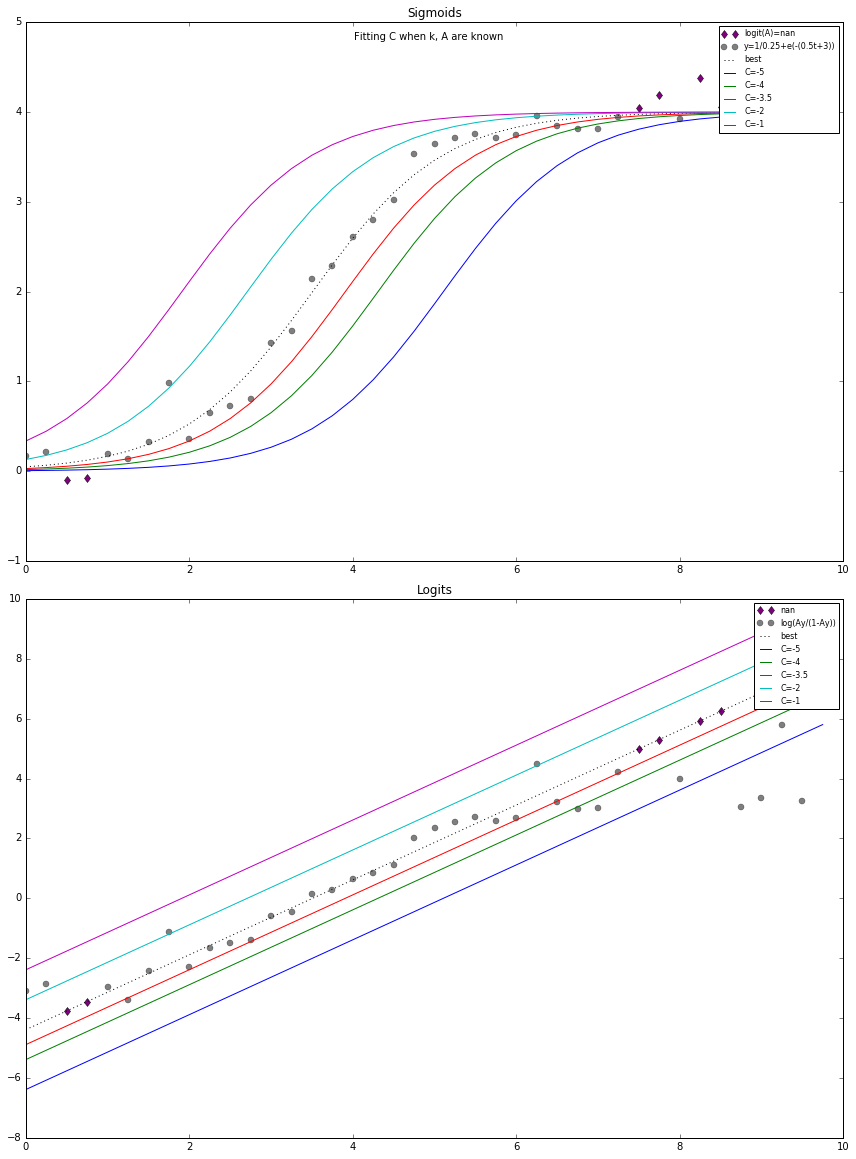

In [128]:
# consider a family of curves trying to guess the parameters
## FIND THE C's
    
Cs = [-5, -4, -3.5, -2, -1]

plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
# plt.plot(t,y,'ko', label='y=1/0.25+e(-(0.5t+3))', alpha=0.5)
sigmoid_scatter_plotter(t,y,ly)
plt.subplot(3,1,2)
# plt.plot(t,ly,'ko', label='log(Ay/(1-Ay))', alpha=0.5)
logit_scatter_plotter(t,ly)
rz = []
rlz = []
for C in Cs:
    plt.subplot(3,1,1)
    z = my_sigmoid(t, C=C)
    plt.plot(t,z,label=('C=%s' % C))
    plt.subplot(3,1,2)
    lz = my_logit(z)
    plt.plot(t,lz,label=('C=%s' % C))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,1)
plt.legend(fontsize=8)
plt.title('Sigmoids')

plt.subplot(3,1,2)
plt.legend(fontsize=8)
plt.title('Logits')

# plt.subplot(3,1,3)
# plt.plot(Cs, rz, label='z')
# plt.plot(Cs, rlz, '-o',label='lz')
# plt.axvline(-3, color='k', linestyle=':')
# plt.legend(fontsize=8)
# plt.title('Residuals')

plt.tight_layout()
plt.suptitle('Fitting C when k, A are known')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


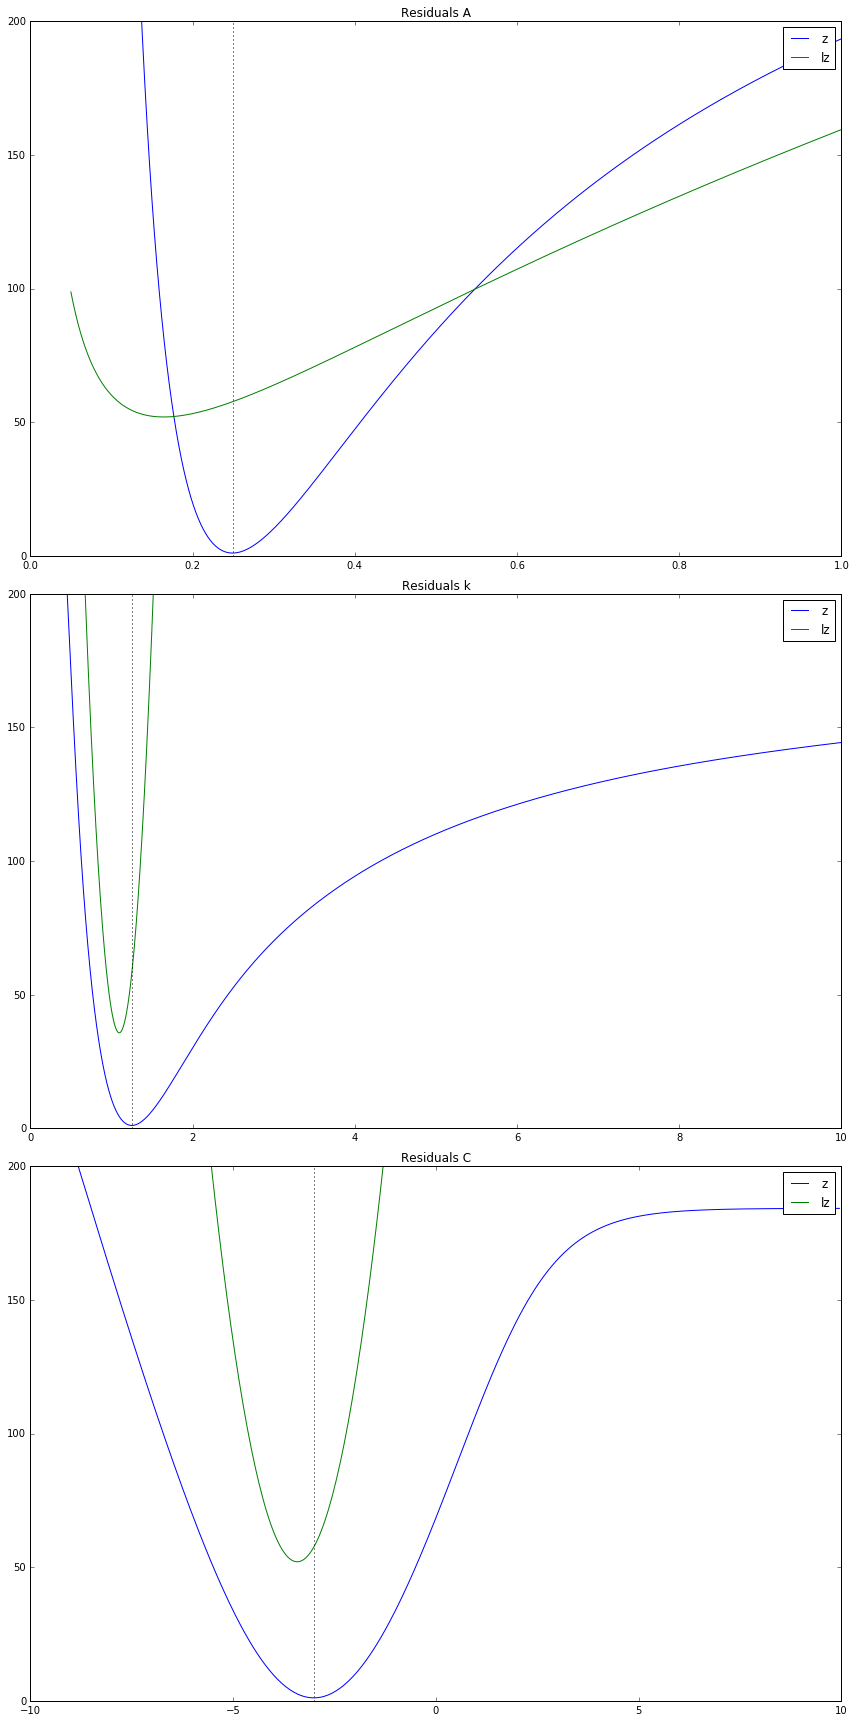

In [129]:
## Look at convexity of data
plt.figure(figsize=(12,24))

Cs = np.arange(-10,10,0.05)
rz = []
rlz = []
for C in Cs:
#     plt.subplot(3,1,1)
    z = my_sigmoid(t, C=C)
#     plt.plot(t,z,label=('C=%s' % C))
#     plt.subplot(3,1,2)
    lz = my_logit(z)
#     plt.plot(t,lz,label=('C=%s' % C))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
plt.subplot(3,1,3)
plt.plot(Cs, rz, label='z')
plt.plot(Cs, rlz, '-',label='lz')
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.title('Residuals C')
plt.ylim([0,200])

rz = []
rlz = []
ks = np.arange(0.01, 10, 0.0005)
for k in ks:
#     plt.subplot(3,1,1)
    z = my_sigmoid(t, k=k)
#     plt.plot(t,z,label=('k=%s' % k))
#     plt.subplot(3,1,2)
    lz = my_logit(z)
#     plt.plot(t,lz,label=('k=%s' % k))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
    
plt.subplot(3,1,2)
plt.plot(ks, rz, label='z')
plt.plot(ks, rlz, '-',label='lz')
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals k')
plt.ylim([0,200])

rz = []
rlz = []
As = np.arange(0.05, 1.0, 0.001)
for A in As:
#     plt.subplot(3,1,1)
    z = my_sigmoid(t, A=A)
#     plt.plot(t,z,label=('A=%s' % A))
#     plt.subplot(3,1,2)
    lz = my_logit(z, A=A)
#     plt.plot(t,lz,label=('A=%s' % A))
    rz.append(my_residuals(y,z))
    rlz.append(my_residuals(ly,lz))
    
    
plt.subplot(3,1,1)
plt.plot(As, rz, label='z')
plt.plot(As, rlz, '-',label='lz')
plt.axvline(0.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals A')
plt.ylim([0,200])

plt.tight_layout()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


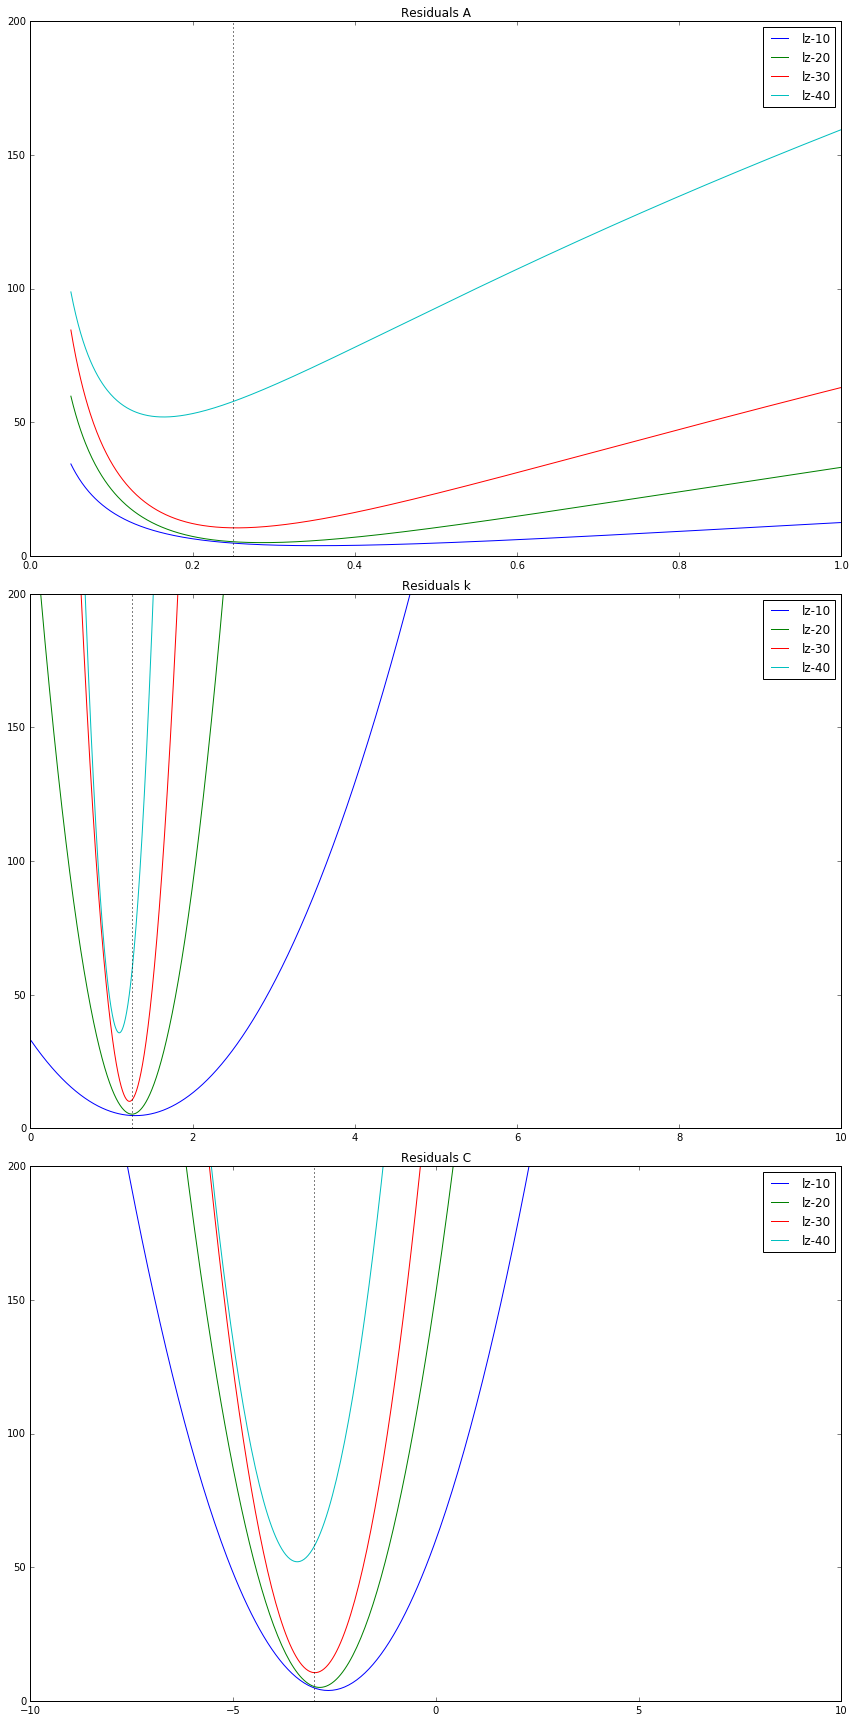

In [134]:
## Look at convexity of data with different proportions of the data fed in
tmaxs = [10, 20, 30,40]
plt.figure(figsize=(12,24))

for tmax in tmaxs:
    Cs = np.arange(-10,10,0.05)
    rz = []
    rlz = []
    for C in Cs:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], C=C)
    #     plt.plot(t,z,label=('C=%s' % C))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('C=%s' % C))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,3)
#     plt.plot(Cs, rz, label=('z-%s' % tmax))
    plt.plot(Cs, rlz, '-',label=('lz-%s' % tmax))

    rz = []
    rlz = []
    ks = np.arange(0.01, 10, 0.0005)
    for k in ks:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], k=k)
    #     plt.plot(t,z,label=('k=%s' % k))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('k=%s' % k))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))

    plt.subplot(3,1,2)
#     plt.plot(ks, rz, label=('z-%s' % tmax))
    plt.plot(ks, rlz, label=('lz-%s' % tmax))


    rz = []
    rlz = []
    As = np.arange(0.05, 1.0, 0.001)
    for A in As:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], A=A)
    #     plt.plot(t,z,label=('A=%s' % A))
    #     plt.subplot(3,1,2)
        lz = my_logit(z, A=A)
    #     plt.plot(t,lz,label=('A=%s' % A))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,1)
#     plt.plot(As, rz, label=('z-%s' % tmax))
    plt.plot(As, rlz, label=('lz-%s' % tmax))
    
plt.subplot(3,1,3)
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.title('Residuals C')
plt.ylim([0,200])

plt.subplot(3,1,2)
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals k')
plt.ylim([0,200])


plt.subplot(3,1,1)

plt.axvline(0.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals A')
plt.ylim([0,200])

plt.tight_layout()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


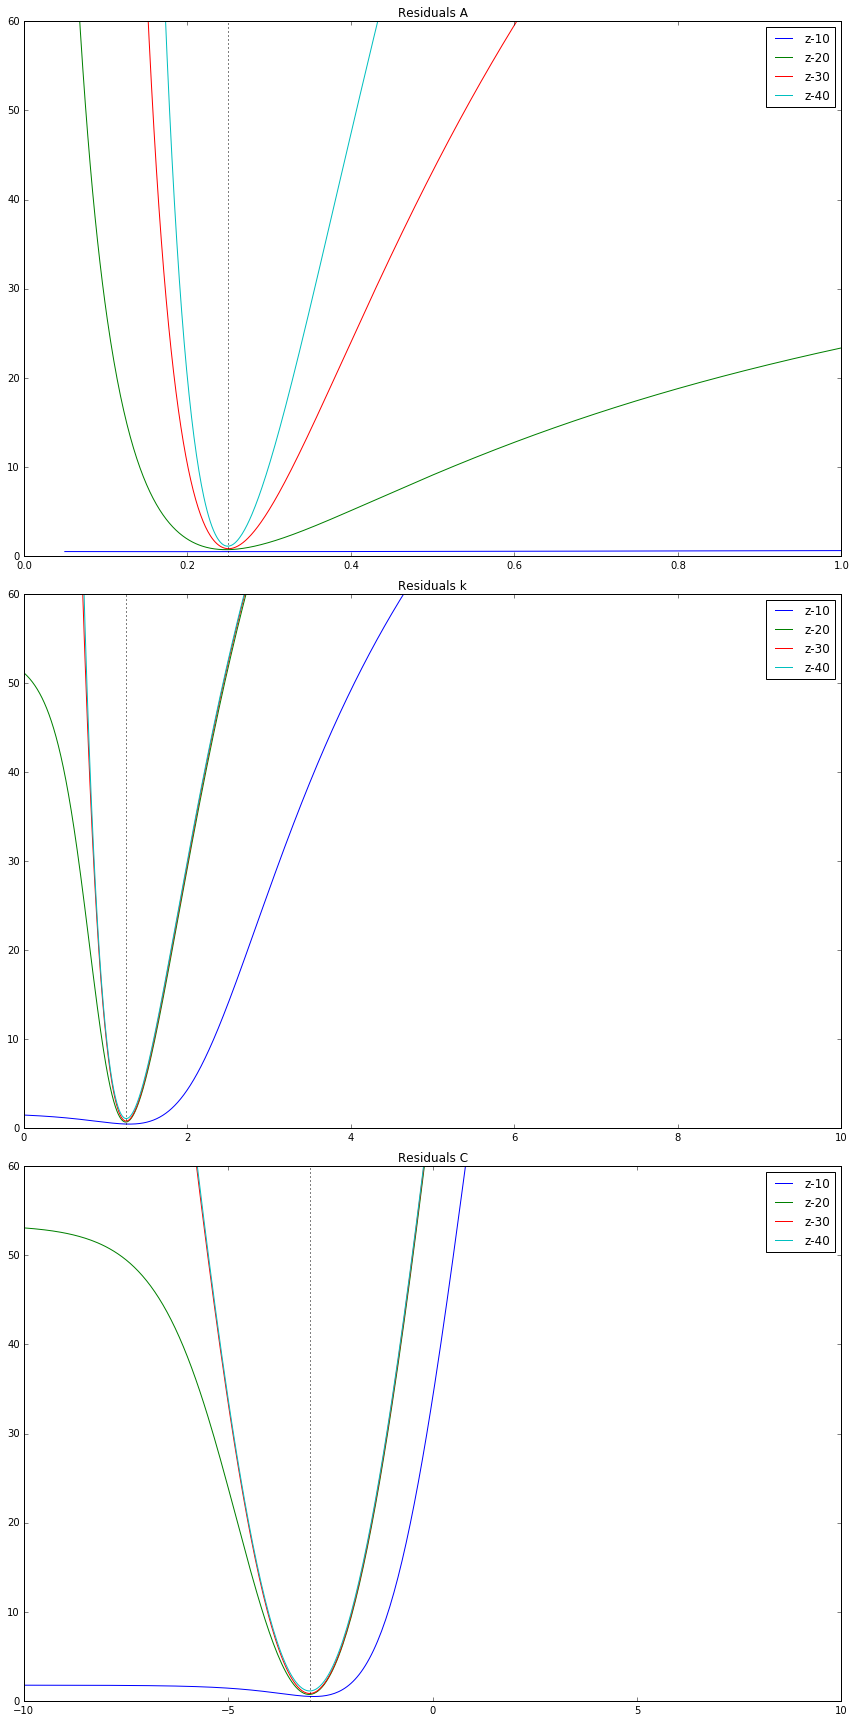

In [136]:
## Look at convexity of data with different proportions of the data fed in
tmaxs = [10, 20, 30,40]
plt.figure(figsize=(12,24))

for tmax in tmaxs:
    Cs = np.arange(-10,10,0.05)
    rz = []
    rlz = []
    for C in Cs:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], C=C)
    #     plt.plot(t,z,label=('C=%s' % C))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('C=%s' % C))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,3)
    plt.plot(Cs, rz, label=('z-%s' % tmax))
#     plt.plot(Cs, rlz, '-',label=('lz-%s' % tmax))

    rz = []
    rlz = []
    ks = np.arange(0.01, 10, 0.0005)
    for k in ks:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], k=k)
    #     plt.plot(t,z,label=('k=%s' % k))
    #     plt.subplot(3,1,2)
        lz = my_logit(z)
    #     plt.plot(t,lz,label=('k=%s' % k))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))

    plt.subplot(3,1,2)
    plt.plot(ks, rz, label=('z-%s' % tmax))
#     plt.plot(ks, rlz, label=('lz-%s' % tmax))


    rz = []
    rlz = []
    As = np.arange(0.05, 1.0, 0.001)
    for A in As:
    #     plt.subplot(3,1,1)
        z = my_sigmoid(t[:tmax], A=A)
    #     plt.plot(t,z,label=('A=%s' % A))
    #     plt.subplot(3,1,2)
        lz = my_logit(z, A=A)
    #     plt.plot(t,lz,label=('A=%s' % A))
        rz.append(my_residuals(y[:tmax],z[:tmax]))
        rlz.append(my_residuals(ly[:tmax],lz[:tmax]))
    plt.subplot(3,1,1)
    plt.plot(As, rz, label=('z-%s' % tmax))
#     plt.plot(As, rlz, label=('lz-%s' % tmax))
    
plt.subplot(3,1,3)
plt.axvline(-3, color='k', linestyle=':')
plt.legend()
plt.title('Residuals C')
plt.ylim([0,60])

plt.subplot(3,1,2)
plt.axvline(1.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals k')
plt.ylim([0,60])


plt.subplot(3,1,1)

plt.axvline(0.25, color='k', linestyle=':')
plt.legend()
plt.title('Residuals A')
plt.ylim([0,60])

plt.tight_layout()

In [130]:
len(t)

40